In [1]:
import imageio
import numpy as np
from scipy import signal, ndimage
import matplotlib.pyplot as plt


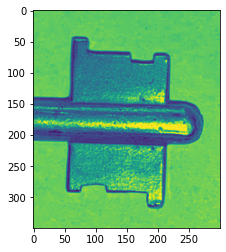

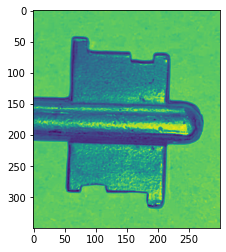

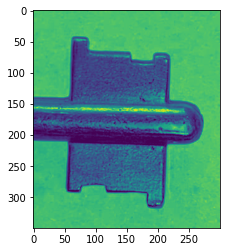

In [2]:
%matplotlib inline
im = imageio.imread('llave_fondo_blanco.jpeg')
im = im[450:800,350:650,:]
plt.imshow(im[:,:,0])
plt.show()
plt.imshow(im[:,:,1])
plt.show()
plt.imshow(im[:,:,2])
plt.show()

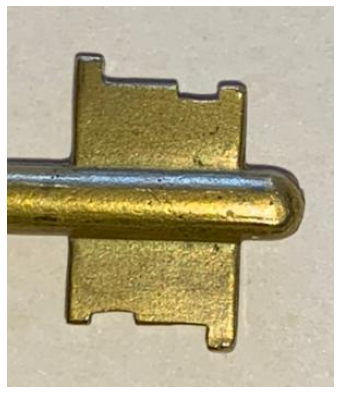

In [31]:
im = imageio.imread('llave_fondo_blanco.jpeg')
im = im[450:800,350:650,:]

fig, ax = plt.subplots(1, figsize=(7,7))

ax.imshow(im)
ax.set_axis_off()


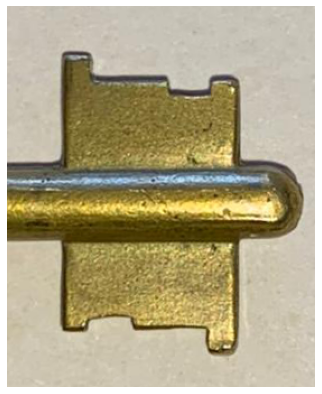

In [38]:
im_rotada = ndimage.rotate(im, 2)

fig, ax = plt.subplots(1, figsize=(7,7))
ax.imshow(im_rotada[10:350,15:290])
ax.set_axis_off()

In [3]:
def plotear_con_coord(im, punto=None):
    plt.imshow(im)
    xlen = im.shape[1]
    ylen = im.shape[0]
    if punto:
        xpunto = punto[0]
        ypunto = punto[1]
        plt.plot([0,xlen],[ypunto,ypunto])
        plt.plot([xpunto,xpunto], [0,ylen])
    plt.xlim([0,xlen])
    plt.ylim([ylen,0])
    plt.show()
    return 

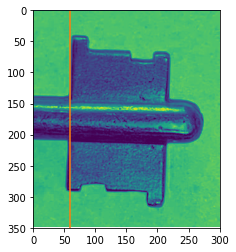

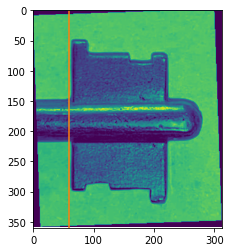

In [4]:
im_az = im[:,:,2]

plotear_con_coord(im_az, punto=[60,0])
plt.show()

angulo = 2
im_rot = ndimage.rotate(im_az, angulo)

plotear_con_coord(im_rot, punto=[60,0])
plt.show()

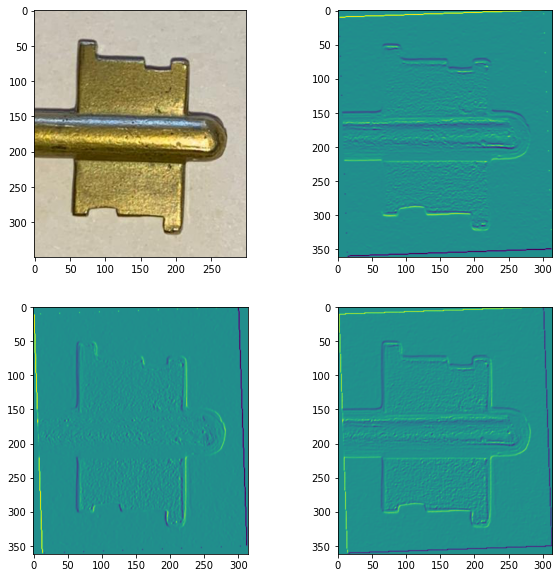

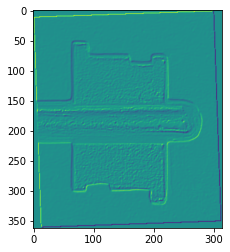

In [5]:
%matplotlib inline

kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
#kernel = kernel * -1

fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0][0].imshow(im)


H = signal.convolve2d(im_rot, kernel)
V = signal.convolve2d(im_rot, np.transpose(kernel))

axs[1][0].imshow(V)
axs[0][1].imshow(H)

bordes = H + V
axs[1][1].imshow(bordes)
plt.show()

plt.imshow(bordes)
#plt.colorbar()
plt.show()




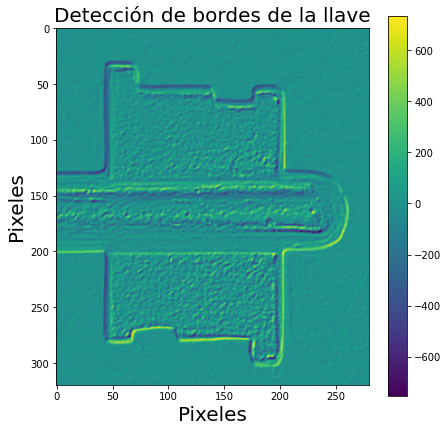

In [7]:
fig, ax = plt.subplots(1, figsize=(7,7))
pos = ax.imshow(bordes[20:340,20:300])
fig.colorbar(pos, ax=ax)
ax.imshow(bordes[20:340,20:300])
ax.set_title("Detección de bordes de la llave", fontsize=20)
ax.set_xlabel("Pixeles", fontsize=20)
ax.set_ylabel("Pixeles", fontsize=20)
plt.show()



(320, 280)


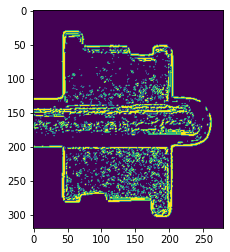

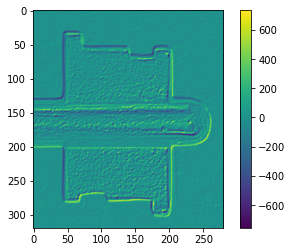

In [9]:
#Binarizo la imagen
filtro1 = (bordes>150)
filtro2 = (bordes<-150)
im_bin = np.zeros(bordes.shape)
im_bin[filtro1] = 1
im_bin[filtro2] = 1

%matplotlib inline

im_bin = im_bin[20:340,20:300]
print(im_bin.shape)
plt.imshow(im_bin)
plt.show()
plt.imshow(bordes[20:340,20:300])
plt.colorbar()
plt.show()

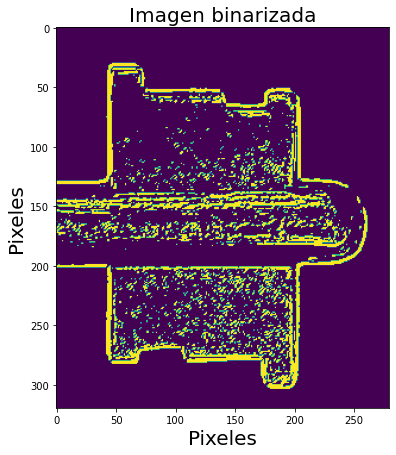

In [14]:
fig, ax = plt.subplots(1, figsize=(7,7))

ax.imshow(im_bin)
ax.set_title("Imagen binarizada", fontsize=20)
ax.set_xlabel("Pixeles", fontsize=20)
ax.set_ylabel("Pixeles", fontsize=20)
#ax.text(250, 10, "Amarillo = 1", color="y")
#ax.legend("amarillo es esto")
plt.show()

In [15]:
def tomar_borde(imagen, inicio=[0,0],fin=[-1, -1] , direccion=True, cambiar_eje=False):
    puntos = []
    fil = inicio[0]
    col = inicio[1]
    fila_fin = fin[0]
    col_fin = fin[1]

    if cambiar_eje: #Tomar bordes verticales
      if direccion: #Tomar desde izquierda a derecha
        while fil < fila_fin:
            supero_col=False
            col = inicio[1]
            pix = imagen[fil, col]
            while not pix and col < col_fin:
                col = col + 1
                pix = imagen[fil, col]
                if col == col_fin:
                  supero_col=True
            if not supero_col:
              puntos.append([col, fil])
            fil += 1
      else: #Tomar desde derecha a izquierda
          while fil < fila_fin:
              supero_col = False
              col = inicio[1]
              pix = imagen[fil, col]
              while not pix and col > col_fin:
                  col = col - 1
                  pix = imagen[fil, col]
                  if col == col_fin:
                    supero_col=True
              if not supero_col:
                puntos.append([col, fil])
              fil += 1
    else: #Tomar bordes horizontales
      if direccion: #Tomar desde abajo para arriba
          while col < col_fin: 
              supero_fila = False
              fil = inicio[0]
              pix = imagen[fil, col]
              while not pix and fil > fila_fin:
                  fil = fil - 1
                  pix = imagen[fil, col]
                  if fil == fila_fin:
                    supero_fila = True
              if not supero_fila:
                puntos.append([col, fil])
              col += 1
      else: #Tomar desde arriba para abajo
          while col < col_fin:
              supero_fila = False
              fil = inicio[0]
              pix = imagen[fil, col]
              while not pix and fil < fila_fin:
                  fil = fil + 1
                  pix = imagen[fil, col]
                  if fil == fila_fin:
                    supero_fila = True
              if not supero_fila:
                puntos.append([col, fil])
              col += 1
    return np.array(puntos)
    

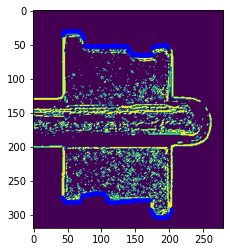

In [16]:
#Tomo los puntos del borde de la imagen

#plotear_con_coord(im_bin, punto=[10,310])

puntos_abajo = tomar_borde(im_bin, inicio=[310,42], fin=[190,204])
puntos_arriba = tomar_borde(im_bin, inicio=[0,43], fin=[150,198], direccion=False)


plt.imshow(im_bin)
plt.plot(puntos_abajo[:,0], puntos_abajo[:,1], '.b')
plt.plot(puntos_arriba[:,0], puntos_arriba[:,1], '.b')
plt.show()

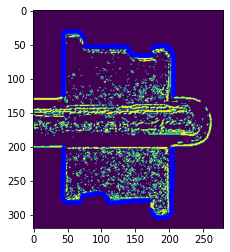

In [17]:
#saco las coord de los bordes verticales

puntos_izq_ab1 = tomar_borde(im_bin, inicio=[202,10], fin=[280,200], cambiar_eje=True)
puntos_izq_ab2 = tomar_borde(im_bin, inicio=[285,10], fin=[295,200], cambiar_eje=True)
puntos_izq_ar = tomar_borde(im_bin, inicio=[38,10], fin=[125,200], cambiar_eje=True)
puntos_der_ab = tomar_borde(im_bin, inicio=[202,250], fin=[295, 10], direccion=False, cambiar_eje=True)
puntos_der_ar = tomar_borde(im_bin, inicio=[55,250], fin=[125, 10], direccion=False, cambiar_eje=True)

plt.imshow(im_bin)
plt.plot(puntos_izq_ab1[:,0], puntos_izq_ab1[:,1], '.b')
#plt.plot(puntos_izq_ab2[:,0], puntos_izq_ab2[:,1], '.r')
plt.plot(puntos_izq_ar[:,0], puntos_izq_ar[:,1], '.b')
plt.plot(puntos_der_ab[:,0], puntos_der_ab[:,1], '.b')
plt.plot(puntos_der_ar[:,0], puntos_der_ar[:,1], '.b')

plt.plot(puntos_arriba[:,0], puntos_arriba[:,1], '.b')
plt.plot(puntos_abajo[:,0], puntos_abajo[:,1], '.b')
plt.show()


Text(0, 0.5, 'Pixeles')

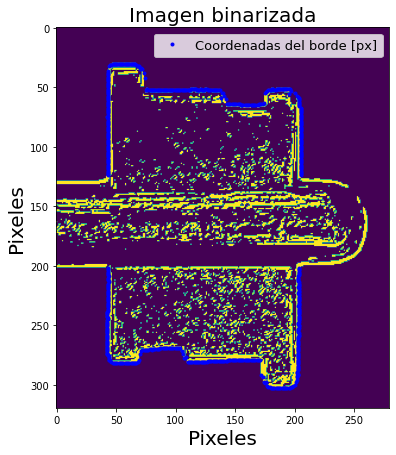

In [28]:
fig, ax = plt.subplots(1, figsize=(7,7))
ax.imshow(im_bin)

borde_llave = np.concatenate((puntos_izq_ab1, puntos_abajo, puntos_der_ab, puntos_der_ar, puntos_arriba, puntos_izq_ar))
borde_plot = ax.plot(borde_llave[:,0],borde_llave[:,1], '.b')
ax.legend((borde_plot), ("Coordenadas del borde [px]",), fontsize=13)
ax.set_title("Imagen binarizada", fontsize=20)
ax.set_xlabel("Pixeles", fontsize=20)
ax.set_ylabel("Pixeles", fontsize=20)


In [94]:

import matplotlib
import time
import pylab as pl
from IPython import display

%matplotlib Qt5
matplotlib.use('Qt5Agg')

fig, ax = plt.subplots(1)
ax.imshow(im_bin)
puntos_der_ab = np.flip(puntos_der_ab, axis=0)
puntos_der_ar = np.flip(puntos_der_ar, axis=0)
puntos_arriba = np.flip(puntos_arriba, axis=0)
borde_llave = np.concatenate((puntos_izq_ab1, puntos_abajo, puntos_der_ab, puntos_der_ar, puntos_arriba, puntos_izq_ar))
for i in range(len(borde_llave)):
    ax.annotate(str(i), (borde_llave[i,0], borde_llave[i,1]))
plt.show()

In [13]:
#Junto todos los puntos que son del borde de la llave en un solo array:

#borde_llave = np.concatenate((puntos_der_ab, puntos_der_ar, puntos_izq_ab, puntos_izq_ar, puntos_abajo, puntos_arriba))
plt.plot(borde_llave[:,0], borde_llave[:,1], '.b')
plt.imshow(im_bin)
plt.show()

In [78]:
#importo FreeCAD
import sys
freecadpath = "/usr/lib/freecad-python3/lib/"
sys.path.append(freecadpath)
from FreeCAD import Base
import Part
print(borde_llave[:,0].max(), borde_llave[:,0].min())

205 42


In [79]:
vectores_llave = []
#hago que la distancia de los puntos mas alejados de si mismos en x sea 1
borde_llave_norm = borde_llave/(borde_llave[:,0].max() - borde_llave[:,0].min()) 
#Hago que la distancia entre esos puntos sea la que yo quiera multiplicando la lista, en este caso es de 12.13mm
borde_llave_norm = borde_llave_norm * 12.13
for punto in borde_llave_norm:
    vectores_llave.append(Base.Vector(punto[0], punto[1], 0))

In [80]:
#Creo las lineas de freecad
lines = []
for i in range(len(vectores_llave)):
    lines.append(Part.LineSegment(vectores_llave[i-1], vectores_llave[i]))
print(lines)

[<Line segment (3.19994,9.22773,0) (3.19994,15.0323,0) >, <Line segment (3.19994,15.0323,0) (3.19994,15.1067,0) >, <Line segment (3.19994,15.1067,0) (3.19994,15.1811,0) >, <Line segment (3.19994,15.1811,0) (3.19994,15.2555,0) >, <Line segment (3.19994,15.2555,0) (3.19994,15.3299,0) >, <Line segment (3.19994,15.3299,0) (3.19994,15.4044,0) >, <Line segment (3.19994,15.4044,0) (3.19994,15.4788,0) >, <Line segment (3.19994,15.4788,0) (3.27436,15.5532,0) >, <Line segment (3.27436,15.5532,0) (3.19994,15.6276,0) >, <Line segment (3.19994,15.6276,0) (3.19994,15.702,0) >, <Line segment (3.19994,15.702,0) (3.19994,15.7764,0) >, <Line segment (3.19994,15.7764,0) (3.27436,15.8509,0) >, <Line segment (3.27436,15.8509,0) (3.27436,15.9253,0) >, <Line segment (3.27436,15.9253,0) (3.19994,15.9997,0) >, <Line segment (3.19994,15.9997,0) (3.19994,16.0741,0) >, <Line segment (3.19994,16.0741,0) (3.19994,16.1485,0) >, <Line segment (3.19994,16.1485,0) (3.19994,16.2229,0) >, <Line segment (3.19994,16.2229,0

In [87]:
edges = []
for line in lines:
    edges.append(Part.Edge(line))


In [91]:
W = Part.Wire(edges)
print(W.isClosed())
face = Part.Face(W)
print(type(face))
P = face.extrude(Base.Vector(0,0,2.44))
print(type(P))


True
<class 'Part.Face'>
<class 'Part.Solid'>


In [95]:
import Mesh

llave = FreeCAD.ActiveDocument.addObject("Part::Box","Llave")
llave.Shape = P

Mesh.export([llave],u"/home/dina/facultad/labo_4/git_labo_4/actividad_1/analisis_dina/llave1.stl")
Part.export([llave],u"/home/dina/facultad/labo_4/git_labo_4/actividad_1/analisis_dina/llave1.stp")